## PRML 7.1 Sparse kernel machine

# Overview

Example of synthetic data from two classes in two dimensions showing countours of constant $y({\bf x})$ obtained from a suport vector machine having a Gaussian kernel function. Also shown are the descion boudary the margin boundaries, and support vectors.

## Procedure

①All data points should satisfy the constraints (7.5)


②In order to solve constrained optimization problem, Laggrange multipliers $a_n > 0$ is introdued for each of the contrainets in (7.5), giving the Lagurangian function (7.10)

\begin{equation*}
\tilde{L}(a) = \sum_{n=1}^N a_n - \frac{1}{2} \sum_{n=1}^N \sum_{m=1}^N  a_na_m t_n t_m k({\bf x_n}, {\bf x_m})    (7.10)
\end{equation*}

②Only support vectors wihch satisfies the KTT condition determin decision boundary. 

③Obtain $b$ (7.18) using support vectors extracted from KTT conditioin.

④substitute $a_n$, $t_n$,

In [1]:
import math
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
import random
import cvxopt
from cvxopt import matrix, solvers
%matplotlib inline

In [2]:
def kernel(x, y):
    sigma = 5.0
    return np.exp(-norm(x-y)**2 / (2 * (sigma ** 2)))

#(7.10)' (Quadratic Programming)
def L(t, X, N):
    K = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            K[i, j] = t[i] * t[j] * kernel(X[i], X[j])
    Q = matrix(K)
    p = matrix(-1 * np.ones(N))             
    G = matrix(np.diag([-1.0]*N))       
    h = matrix(np.zeros(N))             
    A = matrix(t, (1,N))                
    b = matrix(0.0)                     
    sol = solvers.qp(Q, p, G, h, A, b)
    a = array(sol['x']).reshape(N)
    return a

#(7.13)
def y_x(a, t, X, N, b, x):
    sum = 0
    for n in range(N):
        sum += a[n] * t[n] * kernel(x, X[n])
    return sum + b

#(7.18)
def b(a, t, X, S):
    sum_A = 0
    for n in S:
        sum_B = 0
        for m in S:
            sum_B += a[m] * t[m] * kernel(X[n], X[m])
        sum_A += (t[n] - sum_B)
    return sum_A/len(S)

     pcost       dcost       gap    pres   dres
 0: -2.0878e+01 -5.5099e+01  9e+01  7e+00  2e+00
 1: -5.1770e+01 -8.2323e+01  5e+01  3e+00  1e+00
 2: -1.4788e+02 -1.8641e+02  5e+01  3e+00  9e-01
 3: -6.0146e+02 -7.5039e+02  2e+02  3e+00  9e-01
 4: -1.0594e+03 -1.3062e+03  3e+02  1e+00  5e-01
 5: -1.1672e+03 -1.2433e+03  8e+01  3e-01  9e-02
 6: -1.1685e+03 -1.1732e+03  5e+00  2e-02  5e-03
 7: -1.1682e+03 -1.1695e+03  1e+00  3e-03  9e-04
 8: -1.1685e+03 -1.1685e+03  1e-02  3e-05  1e-05
 9: -1.1685e+03 -1.1685e+03  1e-04  3e-07  1e-07
10: -1.1685e+03 -1.1685e+03  1e-06  3e-09  1e-09
Optimal solution found.


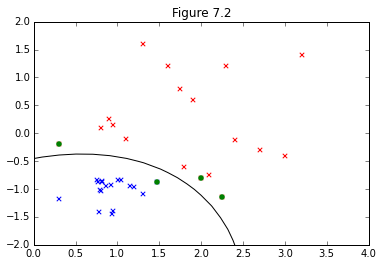

In [3]:
if __name__ == "__main__":
    N = 36
    mu_blue = [1,-1]
    cov = [[0.1,0.05], [0.05,0.1]]
    
    x_blue,y_blue = np.random.multivariate_normal(mu_blue, cov, N/2).T
    
    x_red = [0.3, 0.8, 0.9, 0.95, 1.1, 1.3, 1.6, 1.9, 1.75, 1.8, 2.0, 2.1, 2.3, 2.25, 2.4, 2.7, 3.0, 3.2]
    y_red = [-0.2, 0.1, 0.25, 0.14, -0.1, 1.6, 1.2, 0.6, 0.8, -0.6, -0.8, -0.75, 1.2, -1.15, -0.12, -0.3, -0.4, 1.4]
    
    t_blue = np.ones((1, N/2))
    t_red = -1*np.ones((1, N/2))

    blue = vstack((x_blue, y_blue))
    red = vstack((x_red, y_red))

    X = np.concatenate((blue, red), axis=1).T
    t = np.concatenate((t_blue, t_red), axis=1).T
    
    #(7.10)' (Quadratic Programming)
    a = L(t, X, N)

    #Extract Index of support vectors from (7.14) 
    S = []
    for n in range(len(a)):
        if a[n] < 0.0001: continue
        S.append(n)

    #(7.18)
    b = b(a, t, X, S)

    
    #Plot train data sets
    plt.scatter(x_blue,y_blue,color='b',marker='x')
    plt.scatter(x_red,y_red,color='r',marker='x')
    
    # Enphasize suport vectors
    for n in S:
        plt.scatter(X[n,0], X[n,1], color='g', marker='o')
    
    # Plot the decision surface
    X1, X2 = meshgrid(linspace(-10,10,100), linspace(-10,10,100))
    w, h = X1.shape
    X1.resize(X1.size)
    X2.resize(X2.size)
    Z = array([y_x(a, t, X, N, b, array([x1,x2])) for (x1, x2) in zip(X1, X2)])
    X1.resize((w, h))
    X2.resize((w, h))
    Z.resize((w, h))
    CS = contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
    xlim(0, 4)
    ylim(-2, 2)
    title("Figure 7.2")

### References

Christopher Bishop. (2007). Pattern Recognition and Machine Learning (Information Science and Statistics). Springer